# Multi-layered Perzeptron für MFCC

In [1]:
max_file_count = None
none_replacement = 'all'

HIDDEN_LAYER_SIZE = (30, 30)
RANDOM_STATE = 42

## MFCC Daten laden

🔗 siehe [generate.ipynb](./generate.ipynb)

In [2]:
import numpy as np

feature_matrix = np.load(f'feature_{max_file_count or none_replacement}.npy')
labels = np.load(f'labels_{max_file_count or none_replacement}.npy')

## Aufteilung in Trainings- und Testdaten

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.abs(feature_matrix), labels,
                                                    test_size=0.2, random_state=RANDOM_STATE)

In [4]:
print(X_train.shape)
print(X_test.shape)

(31697, 880)
(7925, 880)


## Training des MLP

In [5]:
from sklearn.neural_network import MLPClassifier
import time

start_time = time.time()

# hidden layers: (100,)
# activation: relu
# solver: adam
# alpha: 0.0001
# batch size: auto
# learning rate: constant (invscaling, adaptive)
# n iter: 200
model = MLPClassifier(
    hidden_layer_sizes=HIDDEN_LAYER_SIZE,
    random_state=RANDOM_STATE)
model.fit(X_train, y_train)

print(f'Execution time: {time.time() - start_time:.2f}s')

Execution time: 11.25s


In [6]:
import skops.io as sio
sio.dump(model, f'mlp_{max_file_count or none_replacement}.skops')

# Test Model

In [7]:
y_test_predict = model.predict(X_test)

In [8]:
from sklearn import metrics

# proportion of correct predictions
print(f'accuracy:  {metrics.accuracy_score(y_test, y_test_predict):.4f}')

# proportion of true positives under all positives
print(f'precision: {metrics.precision_score(y_test, y_test_predict, zero_division=0):.4f}')

# proportion of true positives under actually positives
print(f'recall:    {metrics.recall_score(y_test, y_test_predict):.4f}')

# total performance
print(f'f1:        {metrics.f1_score(y_test, y_test_predict):.4f}')

accuracy:  0.9921
precision: 0.5463
recall:    0.8082
f1:        0.6519


In [9]:
print(metrics.classification_report(y_test, y_test_predict, zero_division=0))

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00      7852
           1       0.55      0.81      0.65        73

    accuracy                           0.99      7925
   macro avg       0.77      0.90      0.82      7925
weighted avg       0.99      0.99      0.99      7925



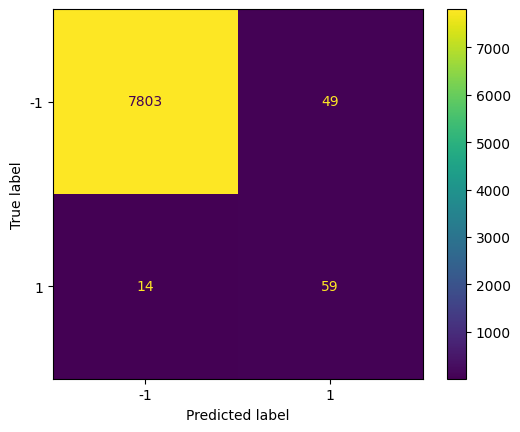

In [10]:
_ = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict)